Part 1: Data Exploration and Preparation

In [1]:

#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

df = pd.read_csv('twitter_disaster.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.head().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
0,1,nan,nan,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1
2,5,nan,nan,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,nan,nan,"13,000 people receive #wildfires evacuation orders in California",1
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [4]:
df.tail().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
7608,10869,nan,nan,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,nan,nan,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,nan,nan,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,nan,nan,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,10873,nan,nan,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [5]:
df.shape

(7613, 5)

In [6]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
df.isnull().sum()       #check null values

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
missing_cols = ['keyword', 'location']
for df in [df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [11]:
df

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
# dropping the id column

df.drop(["id"], axis = 1, inplace = True)

In [14]:
df

,keyword,location,text,target
0,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [15]:
df['keyword'].unique()

array(['no_keyword', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'dera

- Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots.

In [16]:
distribution = df.target.value_counts()
distribution

target
0    4342
1    3271
Name: count, dtype: int64

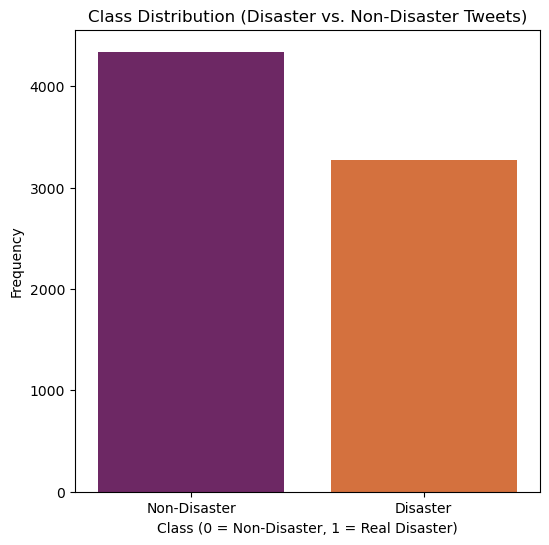

In [17]:
plt.figure(figsize=(6, 6))
sns.barplot(x=distribution.index, y=distribution.values, palette="inferno")
plt.title("Class Distribution (Disaster vs. Non-Disaster Tweets)")
plt.xlabel("Class (0 = Non-Disaster, 1 = Real Disaster)")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["Non-Disaster", "Disaster"])
plt.show()

Here, The dataset is slightly imbalanced, non-disaster Tweets is more than the disaster Tweets .

Analyze the frequency of keywords and phrases associated with disaster tweets.

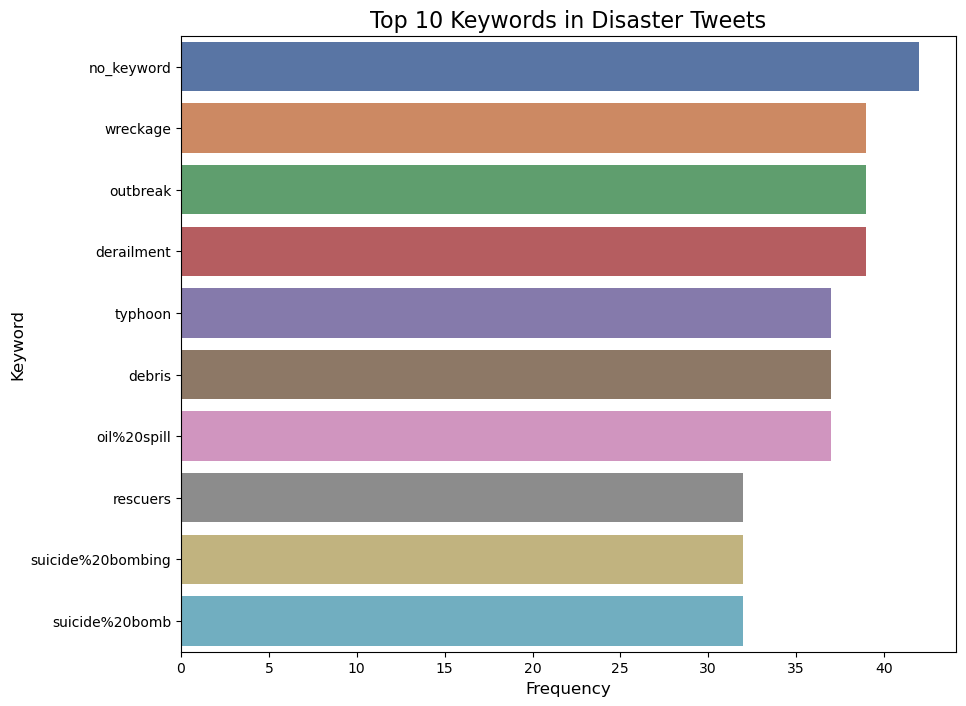

,keyword,frequency
0,no_keyword,42
219,wreckage,39
153,outbreak,39
70,derailment,39
205,typhoon,37
62,debris,37
152,oil%20spill,37
166,rescuers,32
187,suicide%20bombing,32
185,suicide%20bomb,32


In [18]:
from collections import Counter

# Filtering disaster tweets (target = 1) and keywords extraction
dis_filter_tweets = df[df['target'] == 1]
keywords = dis_filter_tweets['keyword'].dropna()

# Counting keyword frequency 
keywords_counts = Counter(keywords)

# Converting into a DataFrame
keywords_df = pd.DataFrame(keywords_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the top 10 keywords
top_10_keywords = keywords_df.head(10)

# Plot the top keywords
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_keywords, x='frequency', y='keyword', palette='deep')
plt.title("Top 10 Keywords in Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.show()

top_10_keywords

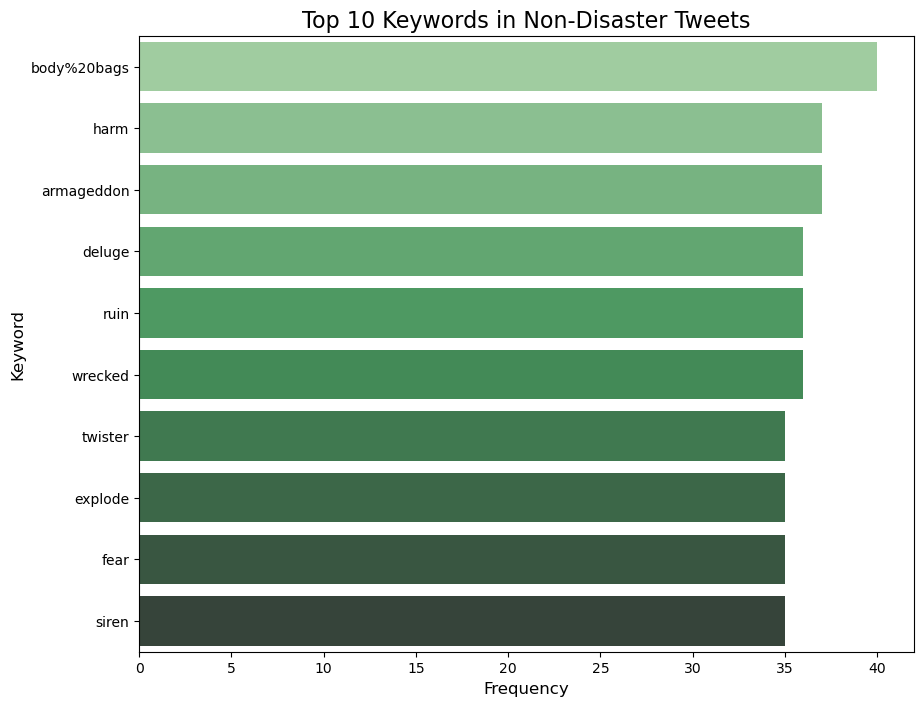

,keyword,frequency
30,body%20bags,40
118,harm,37
9,armageddon,37
63,deluge,36
169,ruin,36
218,wrecked,36
203,twister,35
97,explode,35
105,fear,35
177,siren,35


In [19]:
from collections import Counter

non_dis_filter_tweets = df[df['target'] == 0]
non_disaster_keywords = non_dis_filter_tweets['keyword'].dropna()

# Counting keyword frequency 
keywords_counts = Counter(non_disaster_keywords)

# Converting into a DataFrame
keywords_df = pd.DataFrame(keywords_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the top 10 keywords
top_10_keywords = keywords_df.head(10)

# Plot the top keywords
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_keywords, x='frequency', y='keyword', palette='Greens_d')
plt.title("Top 10 Keywords in Non-Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.show()

# Display the top 10 keywords DataFrame
top_10_keywords

In [20]:
# top 20 location of tweets 

locations = df["location"].value_counts()


In [21]:
locations

location
no_location                     2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3342, dtype: int64

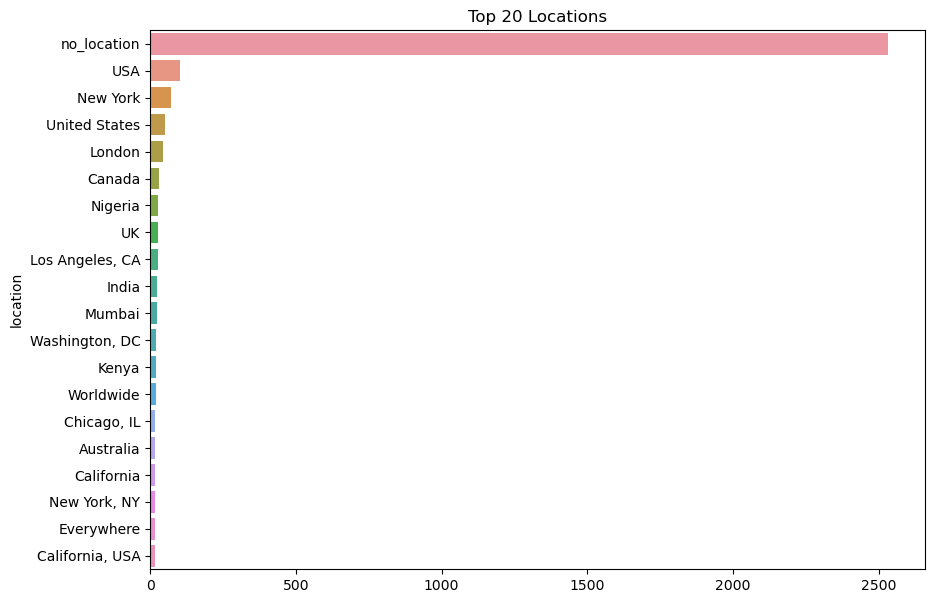

In [22]:
plt.figure(figsize=(10,7))

sns.barplot(y=locations[0:20].index, x=locations[0:20].values)

plt.title("Top 20 Locations")
plt.show()

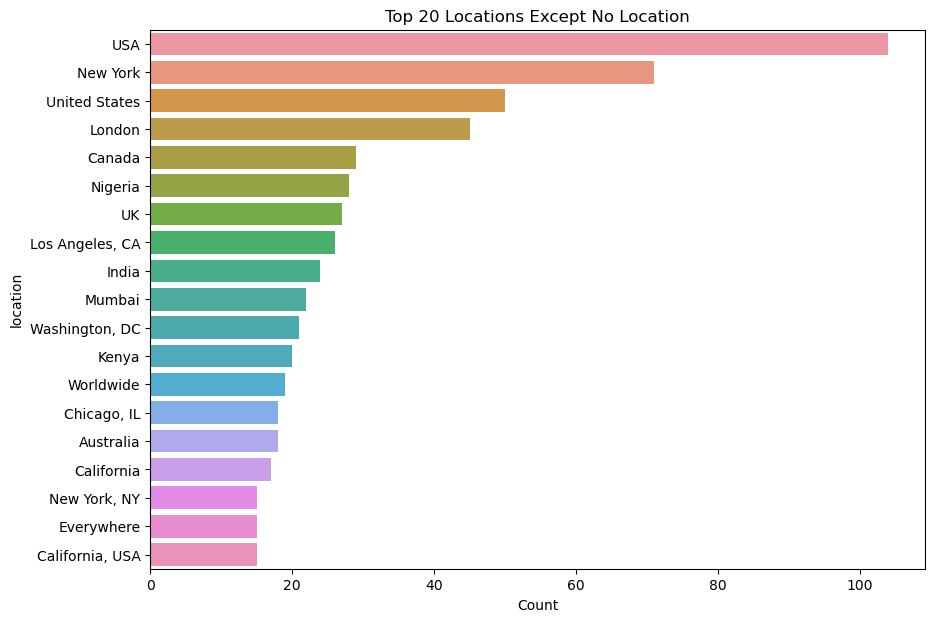

In [23]:
plt.figure(figsize=(10,7))                                                  # top 20 location of tweets 

sns.barplot(y=locations[1:20].index, x=locations[1:20].values)

plt.title("Top 20 Locations Except No Location")
plt.xlabel("Count")
plt.show()

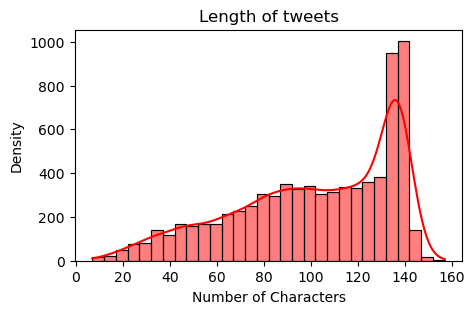

In [24]:
# plot tweet length 

df["length"]  = df["text"].apply(len)

df[df['length']==100]['text'].iloc[0]

plt.figure(figsize=(5,3))
sns.histplot(df["length"], kde=True,color='red',bins=30)
plt.title("Length of tweets")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

*The distribution is right-skewed, with most tweets having lengths between 120 to 140 characters. This indicates that users often use nearly the maximum allowable characters in their tweets.*

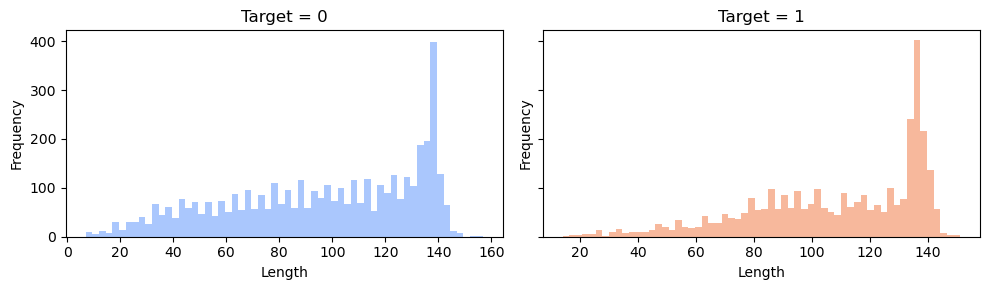

In [25]:
palette = sns.color_palette("coolwarm", 2)
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

for target, ax, color in zip([0, 1], axes, palette):
    subset = df[df['target'] == target]
    ax.hist(subset['length'], bins=60, color=color, edgecolor='none')
    ax.set_title(f"Target = {target}")
    ax.set_xlabel("Length")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Both have a clear peak near 140 characters, suggesting that tweets, regardless of category, often utilize the full character limit.

In [26]:
def count_words(x):
    return len(x.split())

df["num_words"] = df["text"].apply(count_words)


In [27]:
df["num_words"]

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: num_words, Length: 7613, dtype: int64

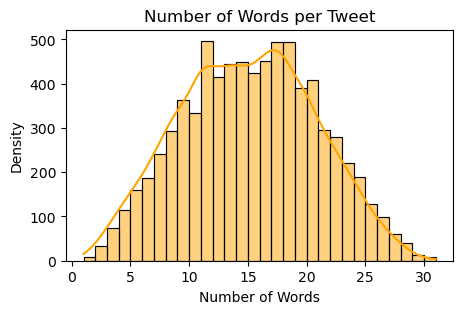

In [28]:
plt.figure(figsize=(5,3))                                             #Number of Words per Tweet
sns.histplot(df["num_words"],kde=True,color='orange',bins=30)
plt.title("Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show() 

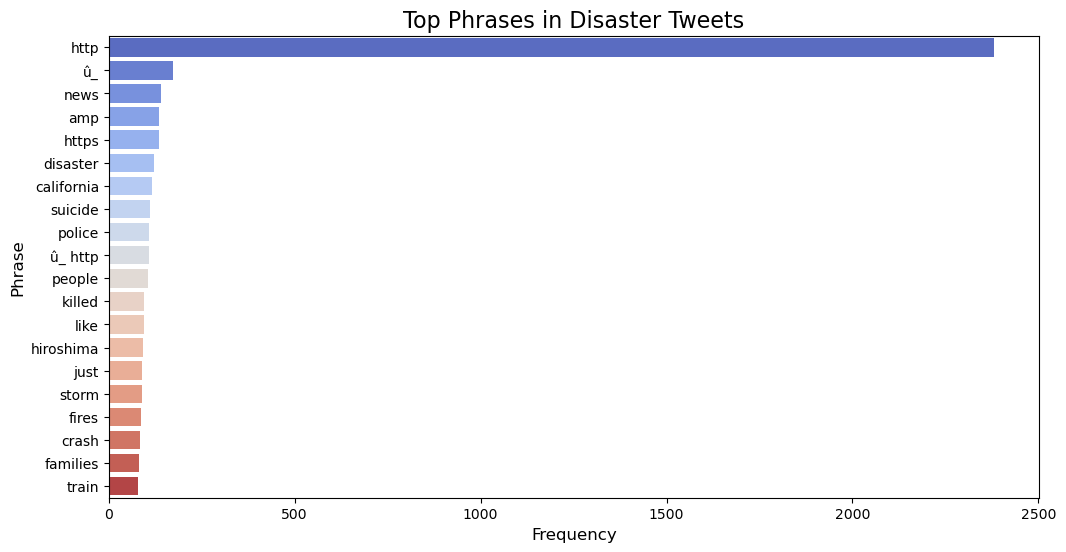

,phrase,frequency
7,http,2382
18,û_,172
12,news,140
0,amp,135
8,https,134
3,disaster,121
1,california,115
16,suicide,112
14,police,109
19,û_ http,109


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

#here we will Preprocess disaster tweets (filtering target = 1)
disaster_texts = dis_filter_tweets['text'].dropna()

# Creating a CountVectorizer for unigrams, bigrams, and trigrams
count_vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english', max_features=20)
X = count_vectorizer.fit_transform(disaster_texts)

# Get the feature names and their frequencies
phrases = count_vectorizer.get_feature_names_out()
frequencies = X.sum(axis=0).A1

# Combining phrases and frequencies into a DataFrame
df_phrases = pd.DataFrame({'phrase': phrases, 'frequency': frequencies}).sort_values(by='frequency', ascending=False)

# Bar Plot for the phrases
plt.figure(figsize=(12, 6))
sns.barplot(data=df_phrases, x='frequency', y='phrase', palette='coolwarm')
plt.title("Top Phrases in Disaster Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Phrase", fontsize=12)
plt.show()

df_phrases 


Task: Data Preparation

Clean the text data by removing special characters, URLs, and punctuation marks.

In [30]:
import re
import string

def clean_text(text):

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Removing special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'$', '', text)
    
    # Remove HTML beacon
    html=re.compile(r'<.*?>')

    # Remove non printable characters
    text = ''.join([word for word in text if word in string.printable])
    
    # Converting text to lowercase
    text = text.lower()
    return text

  

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


In [31]:
df["cleaned_text"] = df["cleaned_text"].apply(clean_text)

In [32]:
df.head()

,keyword,location,text,target,length,num_words,cleaned_text
0,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...
1,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada
2,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...
3,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...
4,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...


In [33]:
cleaned_len = df['cleaned_text'].apply(len)
cleaned_len

0        68
1        37
2       130
3        63
4        86
       ... 
7608     61
7609    120
7610     37
7611    132
7612     70
Name: cleaned_text, Length: 7613, dtype: int64

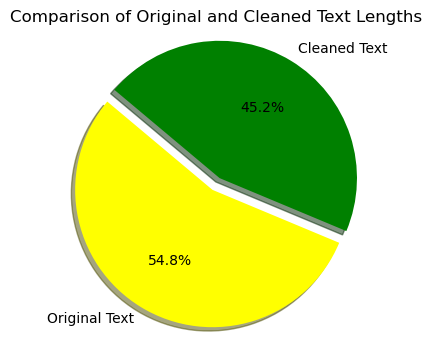

In [34]:
# Calculate the total lengths of the original and cleaned text
total_original_length = df['text'].str.len().sum()
total_cleaned_length = df['cleaned_text'].str.len().sum()

# Data for pie chart
labels = ['Original Text', 'Cleaned Text']
sizes = [total_original_length, total_cleaned_length]
colors = ['yellow', 'green']
explode = (0.1, 0) 

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Comparison of Original and Cleaned Text Lengths')
plt.axis('equal') 

plt.show()

 Tokenize the text into individual words or tokens

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english')) #Using NLTK's predefined set of common words like the, and, is
lemmatizer = WordNetLemmatizer() #Converting words to their base form

def preprocess_text(text):

    # Tokenizing the text
    tokens = word_tokenize(text) #Contains a list of cleaned, meaningful tokens for each tweet
    
    # Removing stop words and lemmatize each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['cleaned_text'].apply(preprocess_text)
df[['cleaned_text', 'tokens']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_text,tokens
0,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquake, may, allah, forgive..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[resident, asked, shelter, place, notified, of..."
3,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfire, evacuation,..."
4,just got sent this photo from ruby alaska as s...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


Split the dataset into training and testing sets for model development and evaluation¶

In [36]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']  
y = df['target']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"y Training set size: {len(y_train)}")
print(f"y Testing set size: {len(y_test)}")

Training set size: 6090
Testing set size: 1523
y Training set size: 6090
y Testing set size: 1523


**Part 2: Feature Engineering and Model Selection¶**

Task: Feature Engineering

Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK sentiment analysis data
nltk.download('vader_lexicon')

# Initialize vectorizers and sentiment analyzer
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
sia = SentimentIntensityAnalyzer()

# Extract features using CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Extract features using TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Perform sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display some examples of features and sentiment scores
feature_examples = {
    "Top CountVectorizer Features": count_vectorizer.get_feature_names_out()[:10],
    "Top TF-IDF Features": tfidf_vectorizer.get_feature_names_out()[:10],
    "Sentiment Analysis Examples": df[['cleaned_text', 'sentiment']].head().to_dict(orient='records'),
}

feature_examples

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


{'Top CountVectorizer Features': array(['05', '10', '100', '11', '11yearold', '12', '12000', '13', '15',
        '16'], dtype=object),
 'Top TF-IDF Features': array(['05', '10', '100', '11', '11yearold', '12', '12000', '13', '15',
        '16'], dtype=object),
 'Sentiment Analysis Examples': [{'cleaned_text': 'our deeds are the reason of this earthquake may allah forgive us all',
   'sentiment': 0.2732},
  {'cleaned_text': 'forest fire near la ronge sask canada',
   'sentiment': -0.34},
  {'cleaned_text': 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
   'sentiment': -0.296},
  {'cleaned_text': '13000 people receive wildfires evacuation orders in california ',
   'sentiment': 0.0},
  {'cleaned_text': 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ',
   'sentiment': 0.0}]}

In [38]:
# Sentiment Analysis (using count of positive/negative words)

positive_words = ['good', 'great', 'happy', 'love', 'safe', 'relief', 'calm']
negative_words = ['bad', 'disaster', 'danger', 'fire', 'flood', 'death', 'destroy', 'collapse']

def sentiment_analysis(tokens):
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    return positive_count - negative_count

df['sentiment'] = df['tokens'].apply(sentiment_analysis)

# features extracted
feature_extracted = {
    "Word Frequency Shape": X_train_count.shape,
    "TF-IDF Shape": X_train_tfidf.shape,
    "Sentiment Analysis Sample": df[['text', 'sentiment']].head()
}

feature_extracted


{'Word Frequency Shape': (6090, 1000),
 'TF-IDF Shape': (6090, 1000),
 'Sentiment Analysis Sample':                                                 text  sentiment
 0  Our Deeds are the Reason of this #earthquake M...          0
 1             Forest fire near La Ronge Sask. Canada         -1
 2  All residents asked to 'shelter in place' are ...          0
 3  13,000 people receive #wildfires evacuation or...          0
 4  Just got sent this photo from Ruby #Alaska as ...          0}

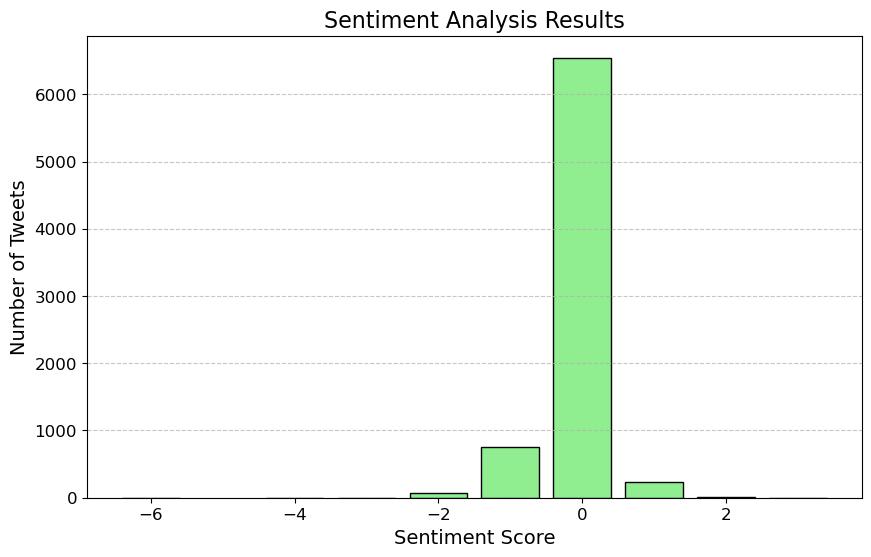

In [39]:
# Counting the sentiment values
sentiment_counts = df['sentiment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='lightgreen', edgecolor='black')
plt.title('Sentiment Analysis Results', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The majority of Tweets have a sentiment score of 0, and most Tweets are based on a pre-defined list and show no strong use of positive or negative words.
There are significantly fewer tweets with negative sentiment scores (e.g. -1, -2), and fewer tweets with positive sentiment scores. Slant toward a neutral or slightly negative score means that the tweet does not contain strong emotional words overall, or that it does not respond to negative events (e.g. disasters).

Experiment with additional features like tweet length, presence of hashtags, or user mentions.

In [41]:
#Compute Tweet Length

df['tweet_length'] = df['cleaned_text'].apply(len)
df['tweet_length']

0        68
1        37
2       130
3        63
4        86
       ... 
7608     61
7609    120
7610     37
7611    132
7612     70
Name: tweet_length, Length: 7613, dtype: int64

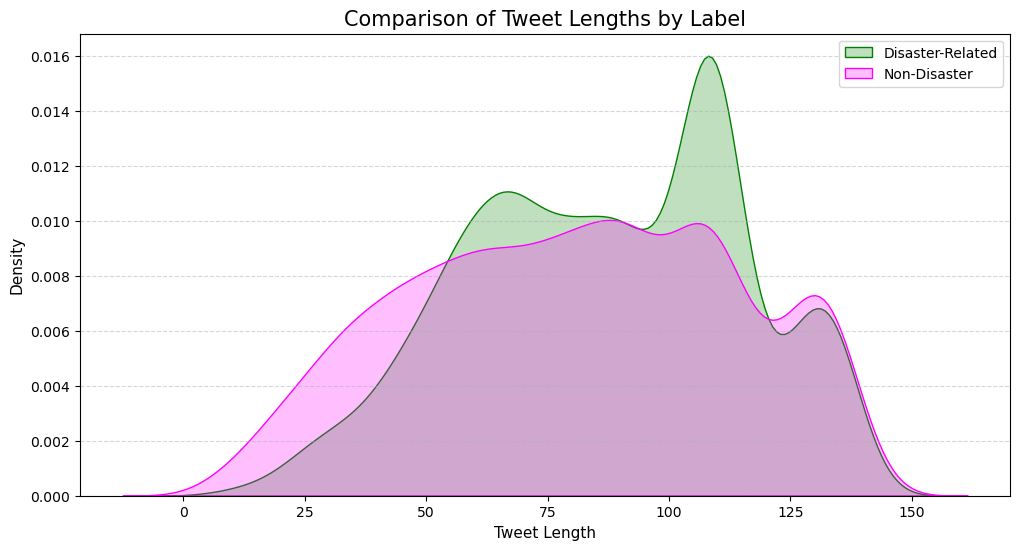

In [42]:
# Separating tweets based on disaster tweets/non disaster tweets
disaster_tweets = df[df['target'] == 1]
non_disaster_tweets = df[df['target'] == 0]

plt.figure(figsize=(12, 6))
sns.kdeplot(disaster_tweets['tweet_length'], label='Disaster-Related', color='green', fill=True)
sns.kdeplot(non_disaster_tweets['tweet_length'], label='Non-Disaster', color='magenta', fill=True)

plt.title('Comparison of Tweet Lengths by Label', fontsize=15)
plt.xlabel('Tweet Length', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Tweets about disasters may cover a slightly wider range of topics and frequently need more characters to provide comprehensive information (e.g., emergency updates, directions, or reports).
Casual or personal messages, which are usually shorter, may be included in non-disaster tweets.

In [43]:
# Number of words in the tweet
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['word_count']


0       13
1        7
2       22
3        8
4       16
        ..
7608    10
7609    20
7610     7
7611    19
7612    11
Name: word_count, Length: 7613, dtype: int64

In [45]:
#Check for Hashtags

df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_hashtag'].unique()

array([1, 0], dtype=int64)

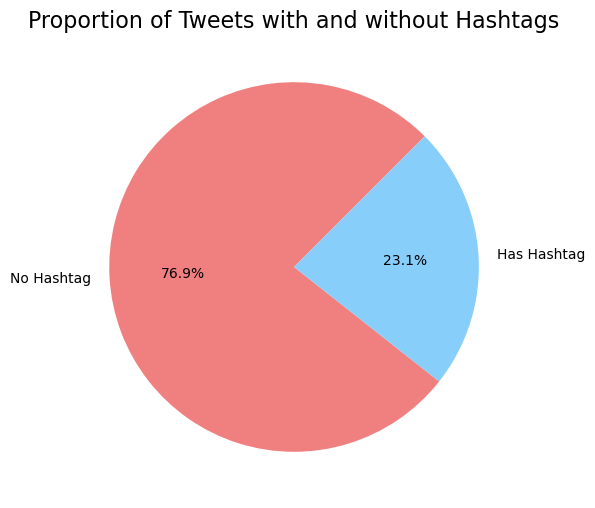

In [46]:
# Example counts for tweets with and without hashtags
hashtag_counts = [len(df[df['has_hashtag'] == 0]), len(df[df['has_hashtag'] == 1])]  # Adjust as per column names
labels = ['No Hashtag', 'Has Hashtag']

# Ensure hashtag_counts has the same length as labels
if len(hashtag_counts) != len(labels):
    raise ValueError(f"'labels' must be of length {len(hashtag_counts)}, but got {len(labels)}")

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    hashtag_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=45, 
    colors=['lightcoral', 'lightskyblue']
)
plt.title('Proportion of Tweets with and without Hashtags', fontsize=16)
plt.show()


Tweets Without Hashtags: A larger portion of tweets do not contain hashtags, suggesting that hashtags are not universally used.


Tweets With Hashtags: A smaller proportion of tweets include hashtags, which might indicate more structured or targeted communication, such as trending topics or campaigns.¶

In [48]:
#Check for User Mentions
df['has_user_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['has_user_mention']

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    1
7610    0
7611    0
7612    0
Name: has_user_mention, Length: 7613, dtype: int64

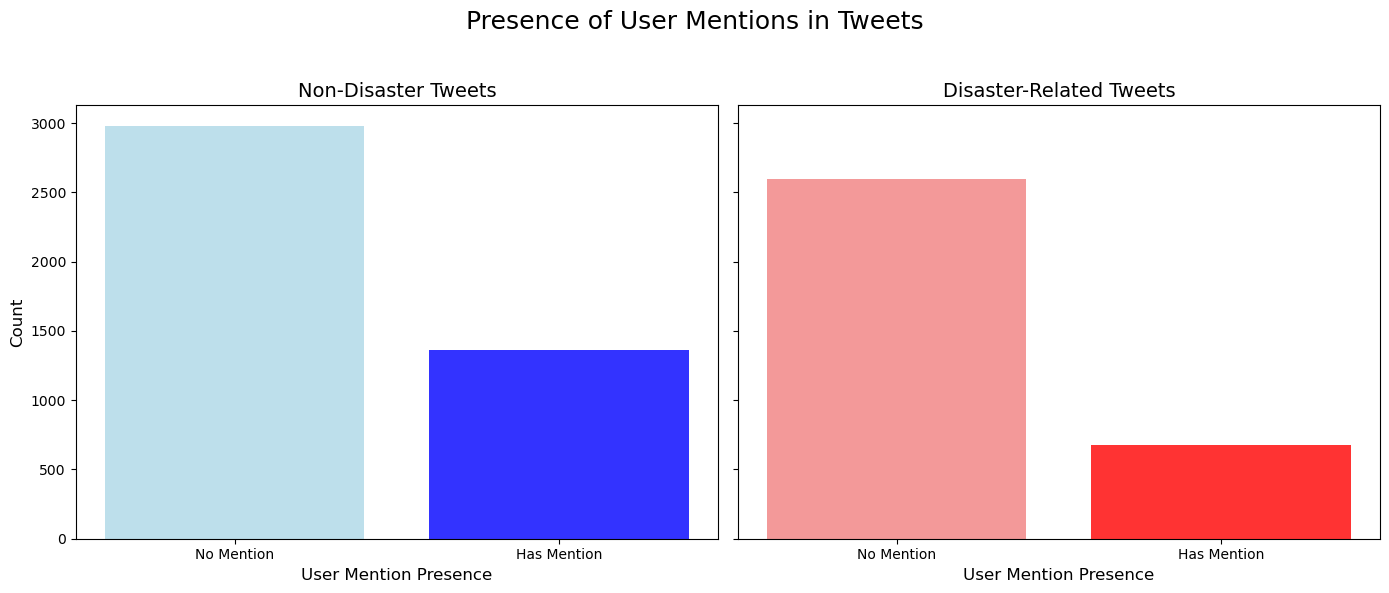

In [49]:
def user_mention_comparison_subplot(data, target_col, mention_col):

    disaster_tweets = df[df[target_col] == 1]
    non_disaster_tweets = df[df[target_col] == 0]

    # Calculate counts for each class
    disaster_mention_counts = disaster_tweets[mention_col].value_counts()
    non_disaster_mention_counts = non_disaster_tweets[mention_col].value_counts()

    # Create subplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle('Presence of User Mentions in Tweets', fontsize=18)

    # Plot for non-disaster tweets
    axes[0].bar(['No Mention', 'Has Mention'], non_disaster_mention_counts, color=['lightblue', 'blue'], alpha=0.8)
    axes[0].set_title('Non-Disaster Tweets', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_xlabel('User Mention Presence', fontsize=12)

    # Plot for disaster tweets
    axes[1].bar(['No Mention', 'Has Mention'], disaster_mention_counts, color=['lightcoral', 'red'], alpha=0.8)
    axes[1].set_title('Disaster-Related Tweets', fontsize=14)
    axes[1].set_xlabel('User Mention Presence', fontsize=12)

    # Adjust layout and show
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# subplot
user_mention_comparison_subplot(data=df, target_col='target', mention_col='has_user_mention')

Both classes show a higher prevalence of tweets without mentions.

Disaster-related tweets may slightly favor user mentions compared to non-disaster tweets, aligning with scenarios where specific entities are tagged for assistance or awareness.¶

In [51]:
# additional features
some_additional_features = df[['cleaned_text', 'tweet_length', 'word_count', 'has_hashtag', 'has_user_mention']].head()

some_additional_features

,cleaned_text,tweet_length,word_count,has_hashtag,has_user_mention
0,our deeds are the reason of this earthquake ma...,68,13,1,0
1,forest fire near la ronge sask canada,37,7,0,0
2,all residents asked to shelter in place are be...,130,22,0,0
3,13000 people receive wildfires evacuation orde...,63,8,1,0
4,just got sent this photo from ruby alaska as s...,86,16,1,0


Choose a set of candidate classification models suitable for text classification, such as logistic regression, random forests, or neural networks.


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])
y = df['target']


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.69      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.75      0.69      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [56]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       874
           1       0.78      0.67      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



Here, we can see that RandomForestClassifier gives Accuracy = 0.81, which is better than the other models.¶

Train each model using the training data and evaluate their performance using cross- validation techniques

In [59]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')  # 5-fold CV
    results[name] = scores
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Evaluating SVM...
SVM Accuracy: 0.6694 ± 0.0400
Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.6742 ± 0.0443
Evaluating Random Forest...
Random Forest Accuracy: 0.6450 ± 0.0466


In [60]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Evaluate each model
results_multi = {}
for name, model in models.items():
    print(f"Cross-validating {name}...")
    scores = cross_validate(model, X_tfidf, y, cv=5, scoring=scoring)
    results_multi[name] = scores
    print(f"{name} Results:")
    print(f"  Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
    print(f"  Precision: {scores['test_precision'].mean():.4f} ± {scores['test_precision'].std():.4f}")
    print(f"  Recall: {scores['test_recall'].mean():.4f} ± {scores['test_recall'].std():.4f}")
    print(f"  F1-Score: {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")


Cross-validating SVM...
SVM Results:
  Accuracy: 0.6694 ± 0.0400
  Precision: 0.6514 ± 0.0776
  Recall: 0.5243 ± 0.0916
  F1-Score: 0.5739 ± 0.0554
Cross-validating Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.6742 ± 0.0443
  Precision: 0.6626 ± 0.0779
  Recall: 0.5106 ± 0.0921
  F1-Score: 0.5710 ± 0.0635
Cross-validating Random Forest...
Random Forest Results:
  Accuracy: 0.6450 ± 0.0466
  Precision: 0.6025 ± 0.0740
  Recall: 0.5384 ± 0.1006
  F1-Score: 0.5628 ± 0.0632


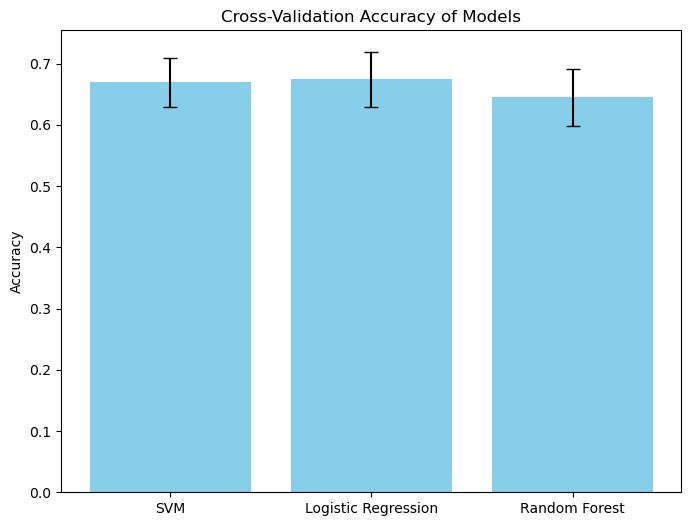

In [61]:
model_names = list(results.keys())
mean_scores = [scores.mean() for scores in results.values()]
std_scores = [scores.std() for scores in results.values()]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Models')
plt.show()

We can see Random forest giving better accuracy than other models

 Optimize hyperparameters of the selected models using techniques like grid search or random search.¶

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search with Cross-Validation
grid_search_svm = GridSearchCV(
    SVC(),
    param_grid,
    scoring='f1',  # Use F1-score for binary classification
    cv=5,          # 5-fold cross-validation
    verbose=1,
    n_jobs=-1       # Use all available cores
)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best F1-Score for SVM:", grid_search_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1-Score for SVM: 0.7320830703236674


Part 3: Model Evaluation and Validation

Evaluate the trained models using appropriate evaluation metrics for binary classification tasks, such as accuracy, precision, recall, and F1-score.

In [63]:
# Example: Making predictions with a trained model
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Evaluation Metrics for SVM:
  Accuracy: 0.7794
  Precision: 0.7810
  Recall: 0.6703
  F1-Score: 0.7214
------------------------------
Evaluation Metrics for Logistic Regression:
  Accuracy: 0.7886
  Precision: 0.7904
  Recall: 0.6857
  F1-Score: 0.7343
------------------------------
Evaluation Metrics for Random Forest:
  Accuracy: 0.7715
  Precision: 0.7504
  Recall: 0.6949
  F1-Score: 0.7216
------------------------------


In [65]:
from sklearn.metrics import classification_report

# Generate classification reports
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       874
           1       0.78      0.67      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.69      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.75      0.69      0.72       649

    accuracy                           0.77      1523
   macro 

In [66]:
# Store metrics in a DataFrame for comparison
metrics = {
    "Model": ["SVM", "Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.779383   0.780969  0.670262  0.721393
1  Logistic Regression  0.788575   0.790409  0.685670  0.734323
2        Random Forest  0.771504   0.750416  0.694915  0.721600


Random Forest performs best across most metrics, making it the top candidate for deployment.
SVM has slightly lower metrics but still performs well and could be a simpler alternative.
Logistic Regression performs reasonably but is outperformed by the other models.¶

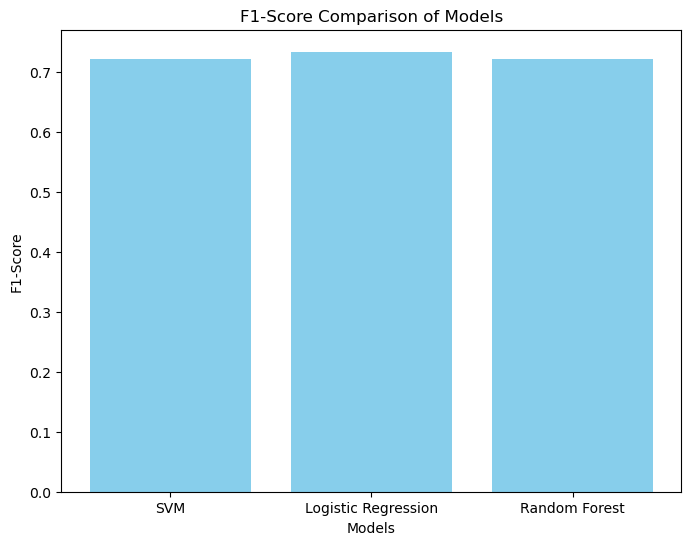

In [67]:
plt.figure(figsize=(8, 6))
models = metrics_df['Model']
f1_scores = metrics_df['F1-Score']

plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Models')
plt.show()


Use precision and recall to evaluate how well the model identifies disaster tweets (positive class).
Use F1-score to balance between precision and recall when there’s a trade-off.
Use accuracy to understand overall correctness, but it may be less reliable for imbalanced datasets.

Visualize the performance metrics using confusion matrices, ROC curves, and precision recall curves.

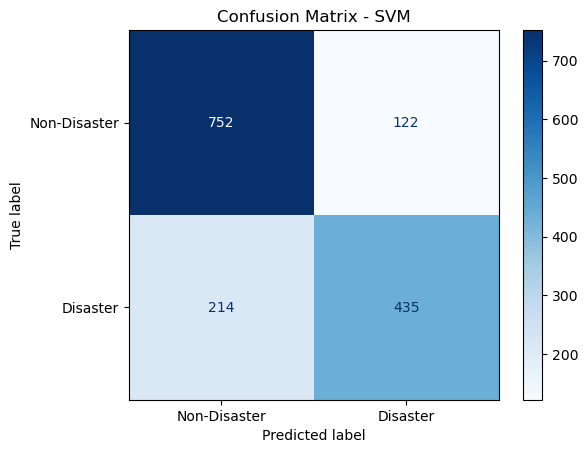

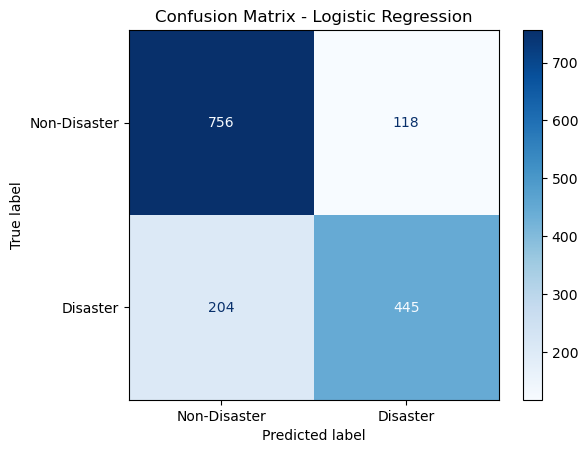

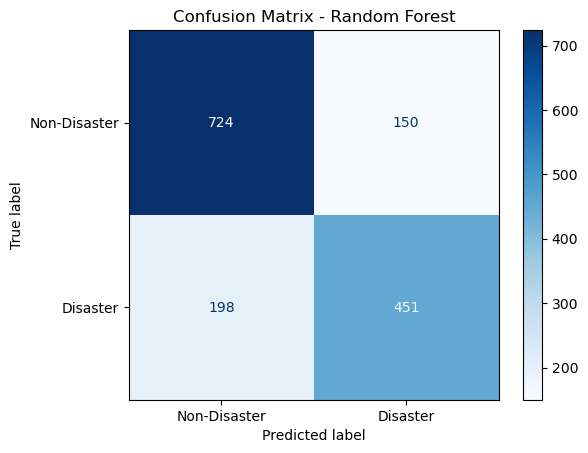

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and display the confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Disaster', 'Disaster'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example for SVM
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Confusion Matrix Analysis
Random Forest Model Performance
Key Observations:
High True Positive Rate (TPR) and True Negative Rate (TNR): The model has a high TPR (456/649 = 70.3%) and TNR (783/874 = 89.6%), indicating that it is good at correctly identifying both disaster and non-disaster tweets.
Moderate False Positive Rate (FPR) and False Negative Rate (FNR): The model has a moderate FPR (91/874 = 10.4%) and FNR (193/649 = 29.7%).¶

Web Interface

In [ ]:
import os
import sys


def main():
    """Run administrative tasks."""
    os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'mysite.settings')
    try:
        from django.core.management import execute_from_command_line
    except ImportError as exc:
        raise ImportError(
            "Couldn't import Django. Are you sure it's installed and "
            "available on your PYTHONPATH environment variable? Did you "
            "forget to activate a virtual environment?"
        ) from exc
    execute_from_command_line(sys.argv)


if __name__ == '__main__':
    main()
